In [1]:
%load_ext autotime

import scarf
scarf.__version__

'0.18.2'

time: 3.28 s (started: 2021-09-13 17:49:52 +02:00)


In [2]:
# scarf.fetch_dataset('hca_783K_blood_rnaseq')

time: 1min 21s (started: 2021-09-07 10:53:55 +02:00)


In [2]:
reader = scarf.CrDirReader('hca_783K_blood_rnaseq')
writer = scarf.CrToZarr(reader, 'hca_783K_blood_rnaseq/data.zarr', 
                        chunk_size=(5000, 5000))
writer.dump(batch_size=5000)

  0%|                                                                                                         …

time: 7min 22s (started: 2021-09-07 11:02:06 +02:00)


In [3]:
ds = scarf.DataStore('hca_783K_blood_rnaseq/data.zarr', nthreads=4)

(RNA) Computing nCells and dropOuts:   0%|                                                                    …

(RNA) Computing nCounts:   0%|                                                                                …

(RNA) Computing nFeatures:   0%|                                                                              …

(RNA) Computing RNA_percentMito:   0%|                                                                        …

(RNA) Computing RNA_percentRibo:   0%|                                                                        …

time: 7min 46s (started: 2021-09-07 11:09:29 +02:00)


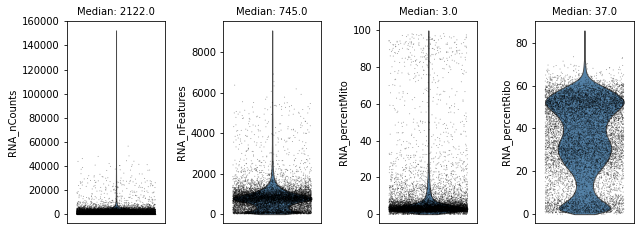

INFO: 248940 cells flagged for filtering out using attribute RNA_nCounts
INFO: 183488 cells flagged for filtering out using attribute RNA_nFeatures
INFO: 107282 cells flagged for filtering out using attribute RNA_percentMito


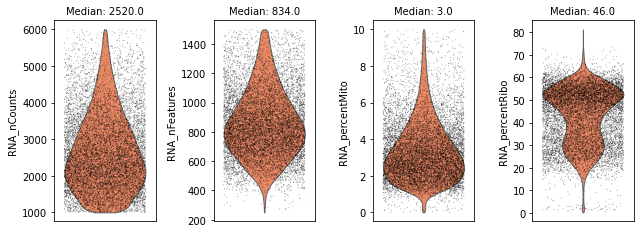

time: 19.2 s (started: 2021-09-07 14:50:30 +02:00)


In [12]:
ds.plot_cells_dists()
ds.filter_cells(
    attrs=['RNA_nCounts', 'RNA_nFeatures', 'RNA_percentMito'],
    lows=[1000, 250, None],
    highs=[6000, 1500, 10]
)
ds.plot_cells_dists(cell_key='I', color='coral')

In [7]:
ds

DataStore has 508041 (782859) cells with 1 assays: RNA
   Cell metadata:
            'I', 'ids', 'names', 'RNA_nCounts', 'RNA_nFeatures', 
            'RNA_percentMito', 'RNA_percentRibo'
   RNA assay has 14493 (58347) features and following metadata:
            'I', 'ids', 'names', 'I__hvgs', 'dropOuts', 
            'nCells', 'stats_I_avg', 'stats_I_c_var__200__0.1', 'stats_I_normed_n', 'stats_I_normed_tot', 
            'stats_I_nz_mean', 'stats_I_sigmas'

time: 31 ms (started: 2021-09-07 11:36:02 +02:00)


(RNA) Computing nCells:   0%|                                                                                 …

(RNA) Computing normed_tot:   0%|                                                                             …

(RNA) Computing sigmas:   0%|                                                                                 …

INFO: 2000 genes marked as HVGs


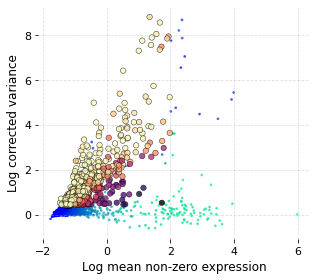

time: 11min 57s (started: 2021-09-07 11:24:04 +02:00)


In [6]:
ds.mark_hvgs(min_cells=1000, top_n=2000, max_mean=2)

In [9]:
ds.make_graph(feat_key='hvgs', k=11, dims=21, n_centroids=500)

Normalizing with feature subset:   0%|                                                                        …

Writing data to normed__I__hvgs/data:   0%|                                                                   …

Calculating mean of norm. data:   0%|                                                                         …

Calculating std. dev. of norm. data:   0%|                                                                    …

Fitting PCA:   0%|                                                                                            …

Fitting ANN:   0%|                                                                                            …

Fitting kmeans:   0%|                                                                                         …

Estimating seed partitions:   0%|                                                                             …

Saving KNN graph:   0%|                                                                                       …

Smoothening KNN distances:   0%|                                                                              …

INFO: ANN recall: 99.94%
time: 30min 53s (started: 2021-09-07 12:58:10 +02:00)


In [13]:
ds.run_leiden_clustering(resolution=0.6)

time: 41.9 s (started: 2021-09-07 14:50:50 +02:00)


In [14]:
ds.run_umap(n_epochs=500, parallel=True)

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
time: 6min 10s (started: 2021-09-07 14:51:31 +02:00)


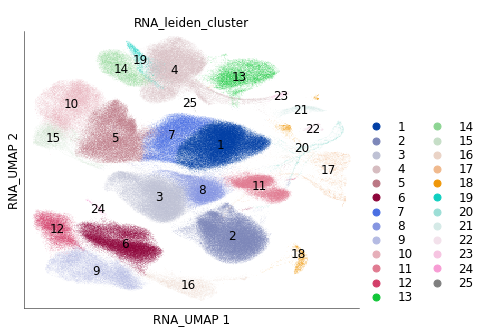

time: 797 ms (started: 2021-09-07 15:25:42 +02:00)


In [28]:
ds.plot_layout(
    layout_key='RNA_UMAP',
    color_by='RNA_leiden_cluster',
    do_shading=True, shade_npixels=300,
)